<a href="https://colab.research.google.com/github/IgnacioRiveraGonzalez/Incidencias_Tibco/blob/main/PYOD_LPTIB502_GLE_TEDT_BW_DIIC_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyod

     |████████████████████████████████| 116 kB 5.0 MB/s 
  Created wheel for pyod: filename=pyod-0.9.9-py3-none-any.whl size=139325 sha256=49154ff9a9226040bd68ab6a355990d1ce1569de10a9177d7b22b77fcdcb39f6
  Stored in directory: /root/.cache/pip/wheels/68/32/f0/0dc3050775e77b6661a116b70817b02b4305fa253269d6d998
Successfully built pyod


In [ ]:
!pip install suod

     |████████████████████████████████| 2.1 MB 4.8 MB/s 
  Created wheel for suod: filename=suod-0.0.8-py3-none-any.whl size=2155017 sha256=90523a5ae7394636cc03189ec8c8bdae934a420635c426a327c8657fcf99fb9e
  Stored in directory: /root/.cache/pip/wheels/01/a0/03/d266aba1169e0fcc69bafab6a56fa6d90241262b6e0fe2a229
  Created wheel for combo: filename=combo-0.1.3-py3-none-any.whl size=42884 sha256=1aecc21a1ec854f8f3a326f476e7f8acf56b5b819d0ae79a24eea71cff6a3aac
  Stored in directory: /root/.cache/pip/wheels/b1/6e/c9/89dab355d4d5d58b11fe135b5839e8a3acc8b73273ffc68cde
Successfully built suod combo


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from pyod.models.suod import SUOD
from pyod.models.lof import LOF
from pyod.models.hbos import HBOS
from pyod.models.pca import PCA
from pyod.models.ocsvm import OCSVM
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.copod import COPOD
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [ ]:
df = pd.read_csv('/content/LPTIB502_GLE_TEDT_BW_DIIC_01_enero_2022_incidencias_marcadas.csv')
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'Unnamed: 0.1', 'processId', 'host', 'metricSetId', 'instance', 'processType', 'uuaa', 'isStarted', 'startTime', 'applicationId', 'reinicio', 'incidencia'], axis=1)
df2 = df2.set_index('timestamp')
df2 = df2.dropna()
df2

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads
timestamp,,,,,
2021-12-30 23:04:32,637009920,133807416,503202504,78,0
2021-12-30 23:14:32,637009920,101013944,535995976,84,0
2021-12-30 23:24:32,637009920,100928136,536081784,84,0
2021-12-30 23:34:32,637009920,100846344,536163576,84,0
2021-12-30 23:44:32,637009920,109223696,527786224,82,0
...,...,...,...,...,...
2022-01-31 13:14:54,642777088,196694448,446082640,69,0
2022-01-31 13:24:54,642777088,167348616,475428472,73,0
2022-01-31 13:34:53,642777088,167266096,475510992,73,0


In [ ]:
df3 = pd.read_csv('/content/LPTIB502_GLE_TEDT_BW_DIIC_01_febrero_marzo_2022_incidencias_marcadas.csv')
df4 = df3.copy()

df4 = df4.drop(['Unnamed: 0', 'Unnamed: 0.1', 'processId', 'host', 'metricSetId', 'instance', 'processType', 'uuaa', 'isStarted', 'startTime', 'applicationId', 'reinicio', 'incidencia'], axis=1)
df4 = df4.set_index('timestamp')
df4 = df4.dropna()
df4

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads
timestamp,,,,,
2022-02-13 23:01:41,662175744,58432856,603742888,91,0.0
2022-02-13 23:11:41,662175744,23598952,638576792,96,0.0
2022-02-13 23:21:42,662175744,72478488,589697256,89,0.0
2022-02-13 23:31:42,662175744,72392304,589783440,89,0.0
2022-02-13 23:41:42,662175744,37690408,624485336,94,0.0
...,...,...,...,...,...
2022-03-17 13:26:43,695205888,36010488,659195400,94,0.0
2022-03-17 13:36:43,687865856,70530232,617335624,89,0.0
2022-03-17 13:46:43,687865856,70443072,617422784,89,0.0


In [ ]:
X_train = df2.copy()
X_test = df4.copy()

y_train = df['incidencia']
y_test = df3['incidencia']

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X_train)

X_train_s = scaler.transform(X_train)

X_train_scaled = pd.DataFrame(X_train_s)

X_train_scaled.columns = X_train.columns
X_train_scaled = X_train_scaled.set_index(X_train.index)


X_test_s = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_s)
X_test_scaled.columns = X_test.columns
X_test_scaled = X_test_scaled.set_index(X_test.index)
X_test_scaled

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads
timestamp,,,,,
2022-02-13 23:01:41,0.488604,0.128246,0.613599,0.857143,0.0
2022-02-13 23:11:41,0.488604,0.037978,0.686439,0.959184,0.0
2022-02-13 23:21:42,0.488604,0.164643,0.584229,0.816327,0.0
2022-02-13 23:31:42,0.488604,0.164420,0.584409,0.816327,0.0
2022-02-13 23:41:42,0.488604,0.074494,0.656973,0.918367,0.0
...,...,...,...,...,...
2022-03-17 13:26:43,0.578348,0.070141,0.729554,0.918367,0.0
2022-03-17 13:36:43,0.558405,0.159595,0.642023,0.816327,0.0
2022-03-17 13:46:43,0.558405,0.159369,0.642205,0.816327,0.0


In [ ]:
# train SUOD
clf_name = 'SUOD'
contamination = 0.001
# initialized a group of outlier detectors for acceleration
detector_list = [LOF(n_neighbors=15,contamination=contamination), LOF(n_neighbors=20,contamination=contamination),
                 LOF(n_neighbors=25,contamination=contamination), LOF(n_neighbors=35,contamination=contamination),
                 COPOD(contamination=contamination), IForest(n_estimators=100,contamination=contamination),
                 IForest(n_estimators=200,contamination=contamination),
                 HBOS(contamination=contamination),
                 PCA(contamination=contamination),
                 OCSVM(contamination=contamination),
                 KNN(n_neighbors=5, contamination=contamination),
                 KNN(n_neighbors=15, contamination=contamination),
                 KNN(n_neighbors=25, contamination=contamination)]

# decide the number of parallel process, and the combination method
clf = SUOD(base_estimators=detector_list, n_jobs=2, combination='average', contamination=contamination, verbose=False)

# or to use the default detectors
# clf = SUOD(n_jobs=2, combination='average',
#            verbose=False)
clf.fit(X_train_scaled)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test_scaled)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test_scaled)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
#visualize(clf_name, X_train_scaled, y_train, X_test_scaled, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    8.2s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    8.2s finished


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    6.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.




On Training Data:
SUOD ROC:0.627, precision @ rank n:0.0

On Test Data:
SUOD ROC:0.7682, precision @ rank n:0.0


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.8s finished


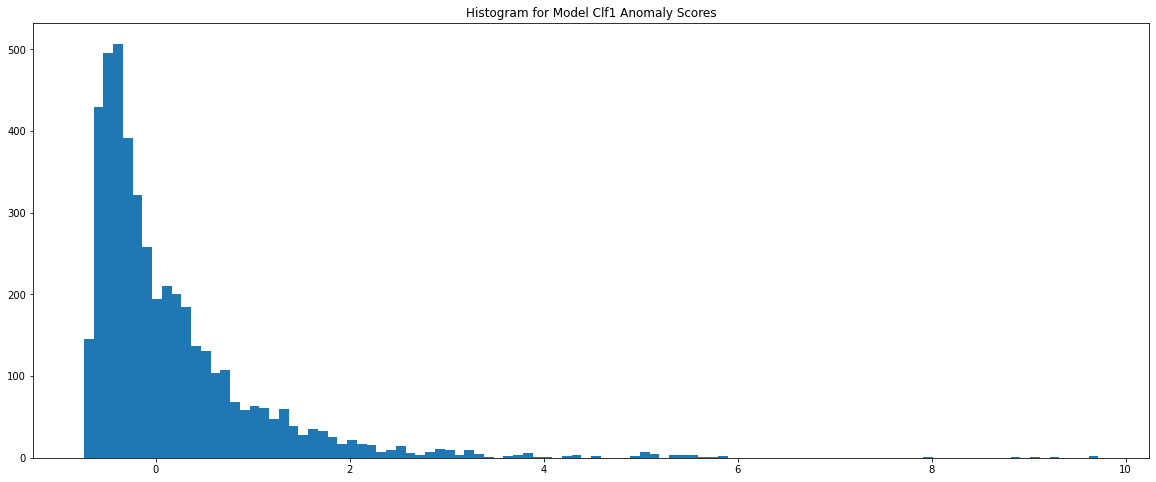

In [ ]:
y_test_scores = pd.Series(y_test_scores)
# Plot it!
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
#plt.xlim([3, 8])
plt.hist(y_test_scores, bins='auto') 
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

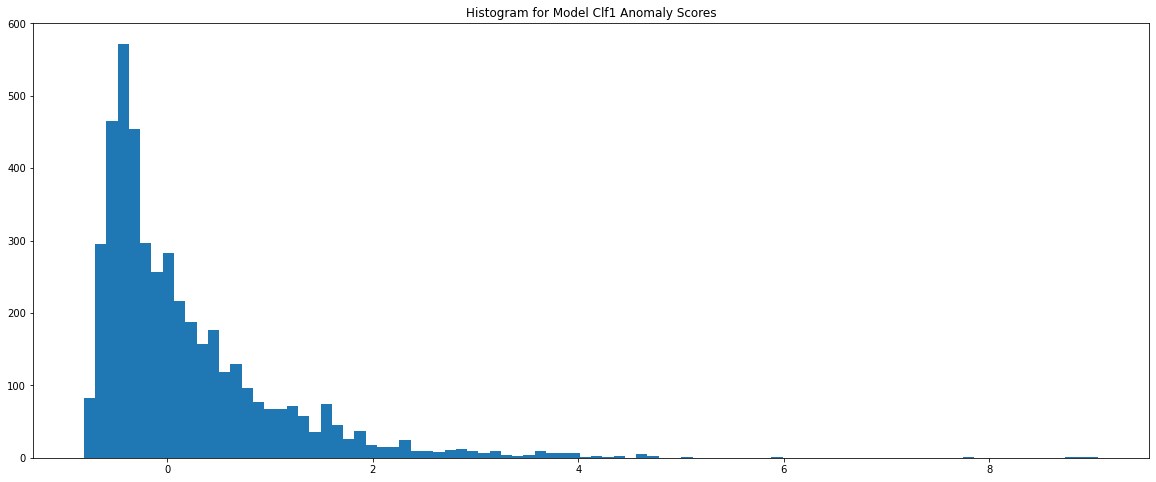

In [ ]:
y_test_scores = pd.Series(y_test_scores)
# Plot it!
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
#plt.xlim([3, 8])
plt.hist(y_test_scores, bins='auto') 
plt.title("Histogram for Model Clf1 Anomaly Scores")
plt.show()

In [ ]:
df_test = X_test_scaled.copy()
df_test['score'] = y_test_scores.values
df_test['cluster'] = np.where(df_test['score']<6, 0, 1)
df_test['cluster'].value_counts()
df_test['outlier'] = y_test_pred
df_test.groupby('cluster').mean()

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads,score,outlier
cluster,,,,,,,
0,0.497250,0.373032,0.422727,0.564069,0.01169,0.170364,0.002419
1,0.490741,0.284728,0.488973,0.663265,1.62500,8.641926,1.000000


In [ ]:
df_test[df_test['cluster']==1]['cluster'].count()

4

In [ ]:
df_test[df_test['cluster']==1]

,jvm_total_memory,jvm_free_memory,jvm_usage_memory,jvm_usage_percent,number_of_threads,score,cluster,outlier
timestamp,,,,,,,,
2022-02-15 20:12:07,0.468661,0.220694,0.523651,0.734694,1.5,7.749977,1,1
2022-03-11 21:35:24,0.497151,0.361940,0.431602,0.571429,1.5,8.836546,1,1
2022-03-11 22:05:24,0.497151,0.101363,0.641870,0.877551,2.0,9.060785,1,1
2022-03-11 22:35:25,0.500000,0.454916,0.358769,0.469388,1.5,8.920396,1,1


In [ ]:
for item in df_test[df_test['outlier']==1].index:
  print(item)

2022-02-15 20:12:07
2022-02-19 08:22:57
2022-02-26 11:41:48
2022-02-26 11:51:48
2022-02-26 12:01:49
2022-03-02 04:52:45
2022-03-02 05:02:44
2022-03-02 05:42:44
2022-03-07 05:43:48
2022-03-11 21:35:24
2022-03-11 22:05:24
2022-03-11 22:35:25
2022-03-15 05:36:11
2022-03-15 05:46:11
2022-03-15 05:56:11


In [ ]:
df3[df3['incidencia']==1]['timestamp']

1053    2022-02-21 06:40:39
2071    2022-02-28 08:32:20
3068    2022-03-07 06:54:24
Name: timestamp, dtype: object

In [ ]:
from joblib import dump, load

# save the fitted model
dump(clf, 'PYOD_LPTIB502_GLE_TEDT_BW_DIIC_01_contamination_0_001.joblib')
# load the model
model = load('PYOD_LPTIB502_GLE_TEDT_BW_DIIC_01.joblib')

In [ ]:
y_test_pred[y_test_pred==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])